In [201]:
import pandas as pd
import warnings
import numpy as np

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("Values Pulse Check 2023_Overall_Raw Data.xlsx")
df = df.iloc[1:].reset_index(drop=True)

In [202]:
print("Total Divisions:", df["Q24_1"].nunique())
df["Q24_1"].unique()

Total Divisions: 44


array(['Finance', 'Strategy', 'IT', 'Logistics', 'Procurement',
       'Merchandise Management', 'Global eCommerce', 'Other',
       'Human Resources', 'Construction & Facility Management',
       'Retail Store', 'Controlling', 'Retail Operations',
       'Sustainability', 'Legal', 'No answer',
       'Product Development & Operations', 'Business Unit BOSS Menswear',
       'Corporate Communications', 'Marketing & Brand Communications',
       'Business Unit HUGO', 'Business Units Ticino', 'Global Retail',
       'eCommerce', 'Business Unit BOSS Womenswear', 'Internal Audit',
       'Technical Center', 'Retail Management', 'Licences',
       'Sourcing & Production', 'Store Design & Visual Merchandising',
       'Materials Management', 'Global Travel Retail', 'Retail Services',
       'Digital Excellence', 'Production Izmir - Jersey',
       'Production Izmir - Womenswear',
       'Production Izmir- Menswear (Suit)', 'Production Izmir - Shirt',
       'Real Estate Management', "Log. Dis

In [203]:
count = df["Q24_1"].value_counts()
count

Q24_1
Business Unit BOSS Menswear               411
Retail Store                              239
Other                                     229
Production Izmir- Menswear (Suit)         187
Human Resources                           148
Product Development & Operations          129
IT                                        122
Logistics                                 114
Business Units Ticino                      99
No answer                                  97
Business Unit BOSS Womenswear              83
Production Izmir - Jersey                  82
Production Izmir - Womenswear              67
Business Unit HUGO                         67
Retail Management                          64
Production Izmir - Shirt                   60
Finance                                    59
Procurement                                56
Merchandise Management                     54
Technical Center                           40
Marketing & Brand Communications           38
Store Design & Visual Mercha

In [204]:
df_to_keep = count[count > 50].index
df = df[df["Q24_1"].isin(df_to_keep)]

df = df[~df['Q24_1'].isin(['Other', 'No answer'])]
# df.dropna(inplace=True)

df.shape

(2041, 40)

In [205]:
# Columns that talk about how well a certain quality is reflected in the division
qualities_columns = ["Q8", "Q10", "Q12", "Q14", "Q16", "Q18"]
division_column = "Q24_1"
extra_columns = ["Q37", "Q25", "Q26", "Q27", "Q23_1"]
df = df[qualities_columns + [division_column] + extra_columns]

null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

# Define a mapping from categorical responses to numerical values
response_mapping = {
    "Very poor": 1,
    "Poor": 2,
    "Satisfactory": 3,
    "Well": 4,
    "Very well": 5,
    "No answer": None,
}

Shape:  (2041, 12)
Null values in each column:
 Q8        7
Q10       5
Q12       9
Q14      12
Q16       6
Q18       6
Q24_1     0
Q37      57
Q25      20
Q26      11
Q27      20
Q23_1     0
dtype: int64


In [206]:
df.columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
    "Division",
    "Occupational Group",
    "Leadership Position",
    "Tenure",
    "Age",
    "Country"
]
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
0,Satisfactory,Satisfactory,Well,Satisfactory,Well,Poor,Finance,White Collar,Yes,1-3 years,43 - 50,Netherlands
2,No answer,Very poor,Very poor,Very poor,Very poor,Very poor,IT,White Collar,No,5-10 years,27 - 34,Germany
3,Poor,Well,Poor,Satisfactory,Very poor,Poor,Logistics,White Collar,No,3-5 years,27 - 34,Germany
4,Very well,Very well,Very well,Well,Very well,Well,Procurement,No answer,No,1-3 years,27 - 34,Switzerland
5,Well,Poor,Satisfactory,Satisfactory,Well,Well,IT,Blue Collar,Yes,> 10 years,35 - 42,Germany


In [207]:
# Convert categorical responses to numerical values for quality columns
qualities_columns = [
    "TRUST",
    "ENTREPRENEURIAL SPIRIT",
    "YOUTHFUL SPIRIT",
    "SIMPLICITY & QUALITY",
    "TEAM MENTALITY",
    "PERSONAL OWNERSHIP",
]

for quality in qualities_columns:
    df[quality] = df[quality].map(response_mapping)
df.head()

,TRUST,ENTREPRENEURIAL SPIRIT,YOUTHFUL SPIRIT,SIMPLICITY & QUALITY,TEAM MENTALITY,PERSONAL OWNERSHIP,Division,Occupational Group,Leadership Position,Tenure,Age,Country
0,3.0,3.0,4.0,3.0,4.0,2.0,Finance,White Collar,Yes,1-3 years,43 - 50,Netherlands
2,NaN,1.0,1.0,1.0,1.0,1.0,IT,White Collar,No,5-10 years,27 - 34,Germany
3,2.0,4.0,2.0,3.0,1.0,2.0,Logistics,White Collar,No,3-5 years,27 - 34,Germany
4,5.0,5.0,5.0,4.0,5.0,4.0,Procurement,No answer,No,1-3 years,27 - 34,Switzerland
5,4.0,2.0,3.0,3.0,4.0,4.0,IT,Blue Collar,Yes,> 10 years,35 - 42,Germany


In [208]:
df.dropna(inplace=True)
null_values = df.isnull().sum()

print("Shape: ", df.shape)
print("Null values in each column:\n", null_values)

Shape:  (1885, 12)
Null values in each column:
 TRUST                     0
ENTREPRENEURIAL SPIRIT    0
YOUTHFUL SPIRIT           0
SIMPLICITY & QUALITY      0
TEAM MENTALITY            0
PERSONAL OWNERSHIP        0
Division                  0
Occupational Group        0
Leadership Position       0
Tenure                    0
Age                       0
Country                   0
dtype: int64


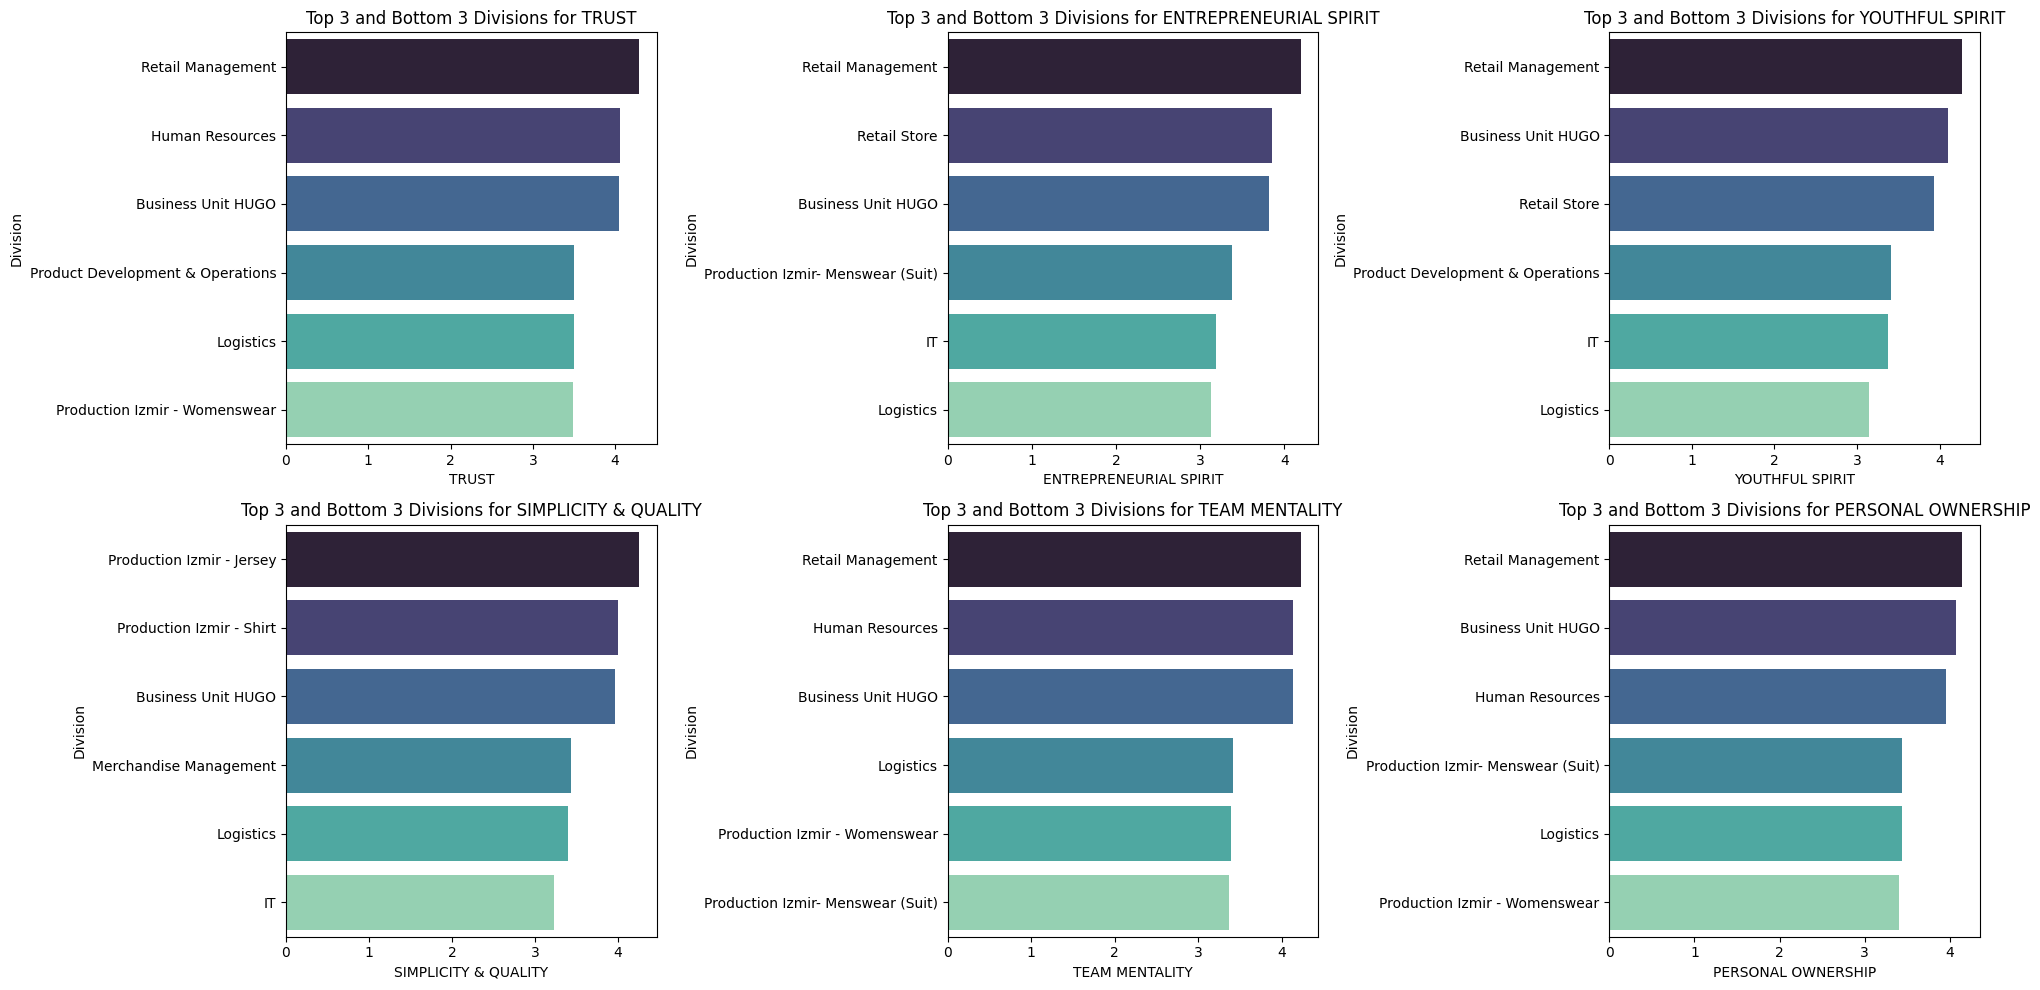

In [209]:
country_data = df[qualities_columns + ['Division']]
country_data = country_data.groupby('Division').mean().reset_index()

# Function to get top 5 and bottom 6 for each quality (column)
def get_top_bottom(df, column):
    sorted_df = df[["Division", column]].sort_values(by=column, ascending=False)
    top_5 = sorted_df.head(3)
    bottom_6 = sorted_df.tail(3)
    combined_df = pd.concat([top_5, bottom_6])
    return combined_df


# Create subplots (2 rows, 3 columns)
fig, ax = plt.subplots(2, 3, figsize=(20, 10))

# Loop through each column and assign each plot to a subplot
for i, col in enumerate(
    qualities_columns
):  # Loop over qualities columns list
    # Get top 5 and bottom 6 for the current column
    top_bottom_df = get_top_bottom(country_data, col)

    # Plot in the corresponding subplot
    sns.barplot(
        x=col, y="Division", data=top_bottom_df, palette="mako", ax=ax[i // 3, i % 3]
    )
    ax[i // 3, i % 3].set_title(f"Top 3 and Bottom 3 Divisions for {col}")
    ax[i // 3, i % 3].set_xlabel(col)
    ax[i // 3, i % 3].set_ylabel("Division")

# Adjust layout for readability
plt.tight_layout()
plt.show()

In [216]:
extracted_data = df[df['Division'].isin(['Retail Management', 'Business Unit HUGO', 'Logistics', 'IT'])]
age_grouped_data = extracted_data.groupby(["Division", "Age"])[qualities_columns].mean()

Descriptive Stats

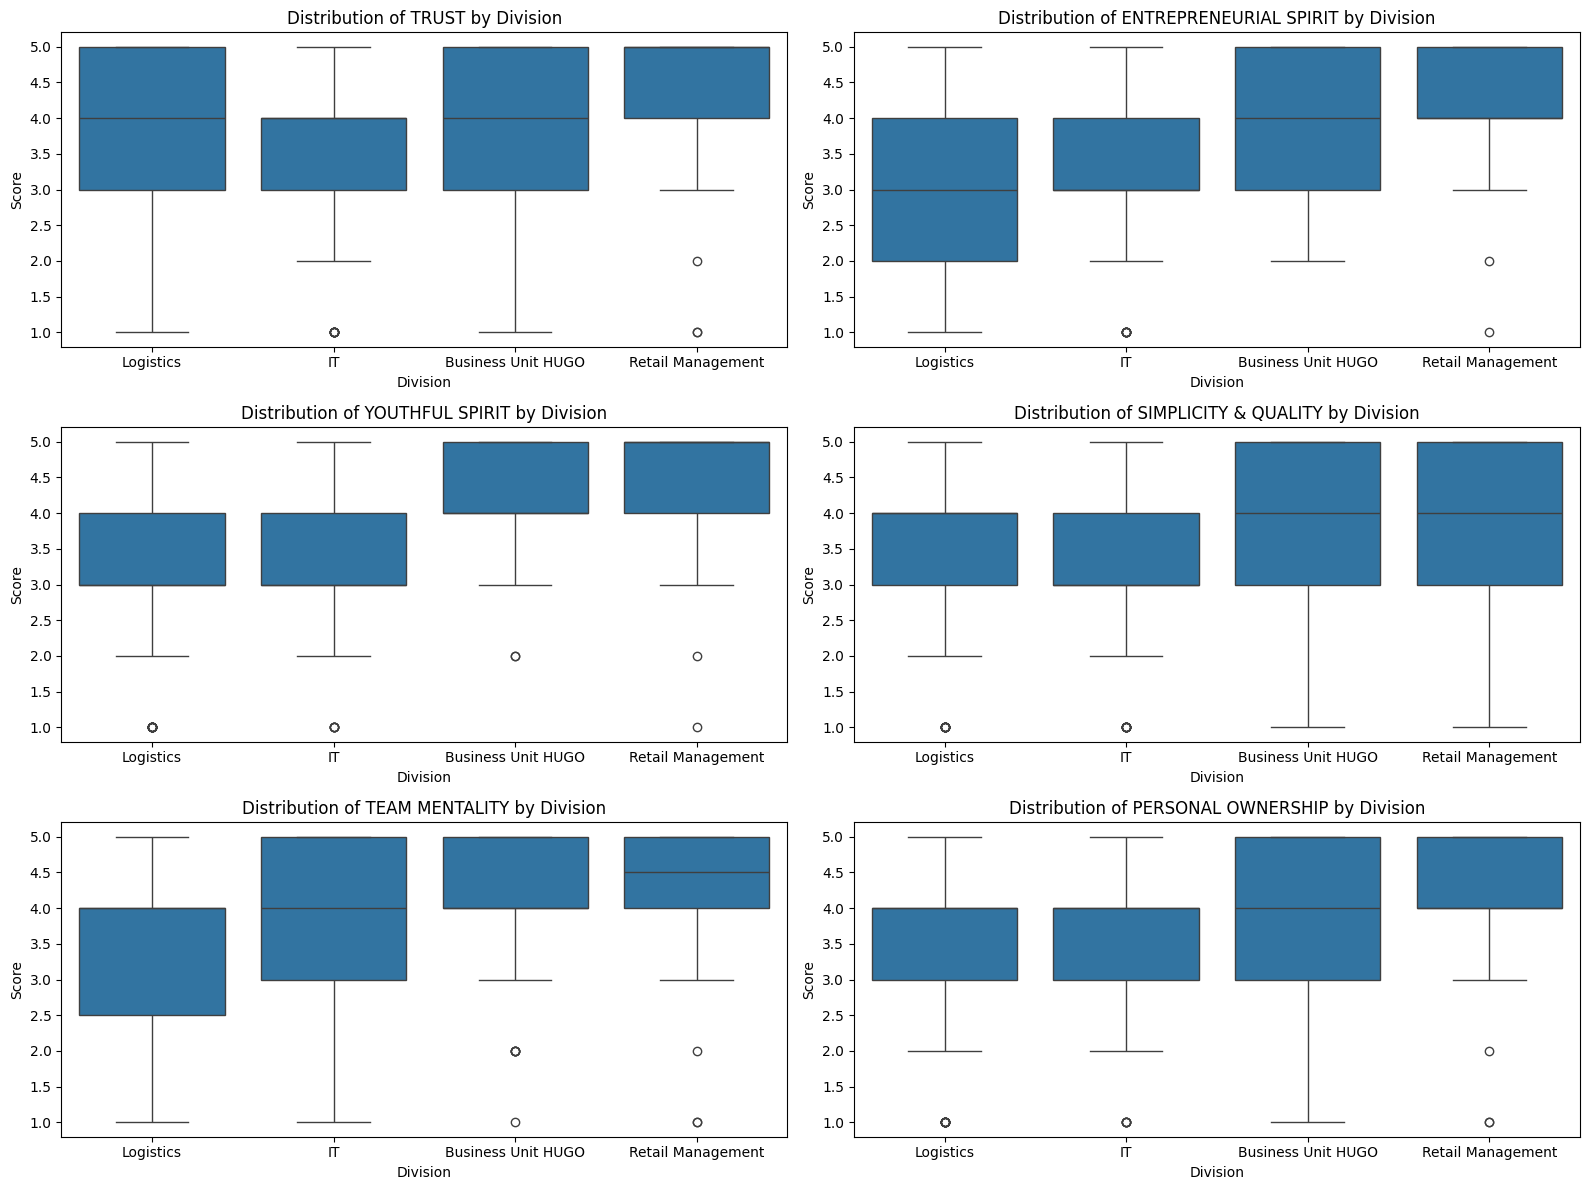

In [225]:
import seaborn as sns

plt.figure(figsize=(16, 12))

for i, quality in enumerate(qualities_columns):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='Division', y=quality, data=extracted_data)
    plt.title(f'Distribution of {quality} by Division')
    plt.ylabel('Score')
    plt.xlabel('Division')

plt.tight_layout()
plt.show()

The box plots provide a clear visual representation of the distribution of various qualities across different divisions. Here are the key insights and interpretations from the graphs:

### Key Insights

1. **Trust**:
   - The **Trust** scores for Retail Management show a higher median than the other divisions, with a smaller interquartile range (IQR), indicating more consistent positive perceptions of trust among employees.
   - **Logistics** has the widest spread, suggesting greater variability in trust levels. Some employees in Logistics report very low trust scores, indicating potential issues that need to be addressed.

2. **Entrepreneurial Spirit**:
   - Retail Management exhibits a noticeably higher median score for **Entrepreneurial Spirit**, with most employees rating it positively. This reflects an environment that encourages innovation and initiative.
   - IT and Business Unit HUGO show similar distributions, but with lower overall scores than Retail Management. Logistics has the lowest scores, suggesting a lack of encouragement for entrepreneurial behavior.

3. **Youthful Spirit**:
   - **Youthful Spirit** scores are highest in Retail Management, indicating a vibrant and engaging workplace. The narrower box suggests that perceptions are more uniform.
   - Both Logistics and IT have lower median scores, particularly in Logistics, where the distribution indicates a broader range of perceptions, possibly reflecting a more conservative workplace culture.

4. **Simplicity & Quality**:
   - The **Simplicity & Quality** scores for Retail Management again show the highest median, indicating that employees perceive processes as streamlined and effective.
   - Other divisions, especially Logistics, show wider IQRs, suggesting variability in employee perceptions of simplicity and quality in their roles.

5. **Team Mentality**:
   - Retail Management maintains the highest median score for **Team Mentality**, reflecting a strong culture of collaboration and support. 
   - The scores for Logistics are again lower and more variable, which may indicate challenges in teamwork and collaboration within that division.

6. **Personal Ownership**:
   - **Personal Ownership** scores in Retail Management are notably higher, indicating that employees feel a strong sense of accountability for their work.
   - In Logistics, the median score is lower, and there is more variability, suggesting that employees may not feel as connected to their roles or responsible for their contributions.

### Conclusions
- **Strength of Retail Management**: The consistently high scores across multiple dimensions suggest effective management practices that foster trust, collaboration, and a culture of accountability.
- **Areas for Improvement in Logistics**: The wide variability and lower scores in Logistics highlight potential issues with trust, teamwork, and empowerment. This division may benefit from targeted initiatives to enhance employee engagement and perceptions.

### Recommendations for Further Analysis
1. **Qualitative Insights**: Consider conducting surveys or focus groups to gather qualitative feedback from employees in Logistics to better understand their experiences and perceptions.
2. **Correlation Analysis**: Examine correlations between the different qualities to identify potential relationships that may exist within the data.
3. **Segment by Tenure**: Analyze how perceptions differ not just by division, but also by employee tenure to uncover any trends related to new vs. long-term employees.
4. **Statistical Testing**: Implement ANOVA or T-tests to statistically validate the differences observed in the box plots.

If you would like to proceed with any specific analysis or require further assistance, feel free to let me know!

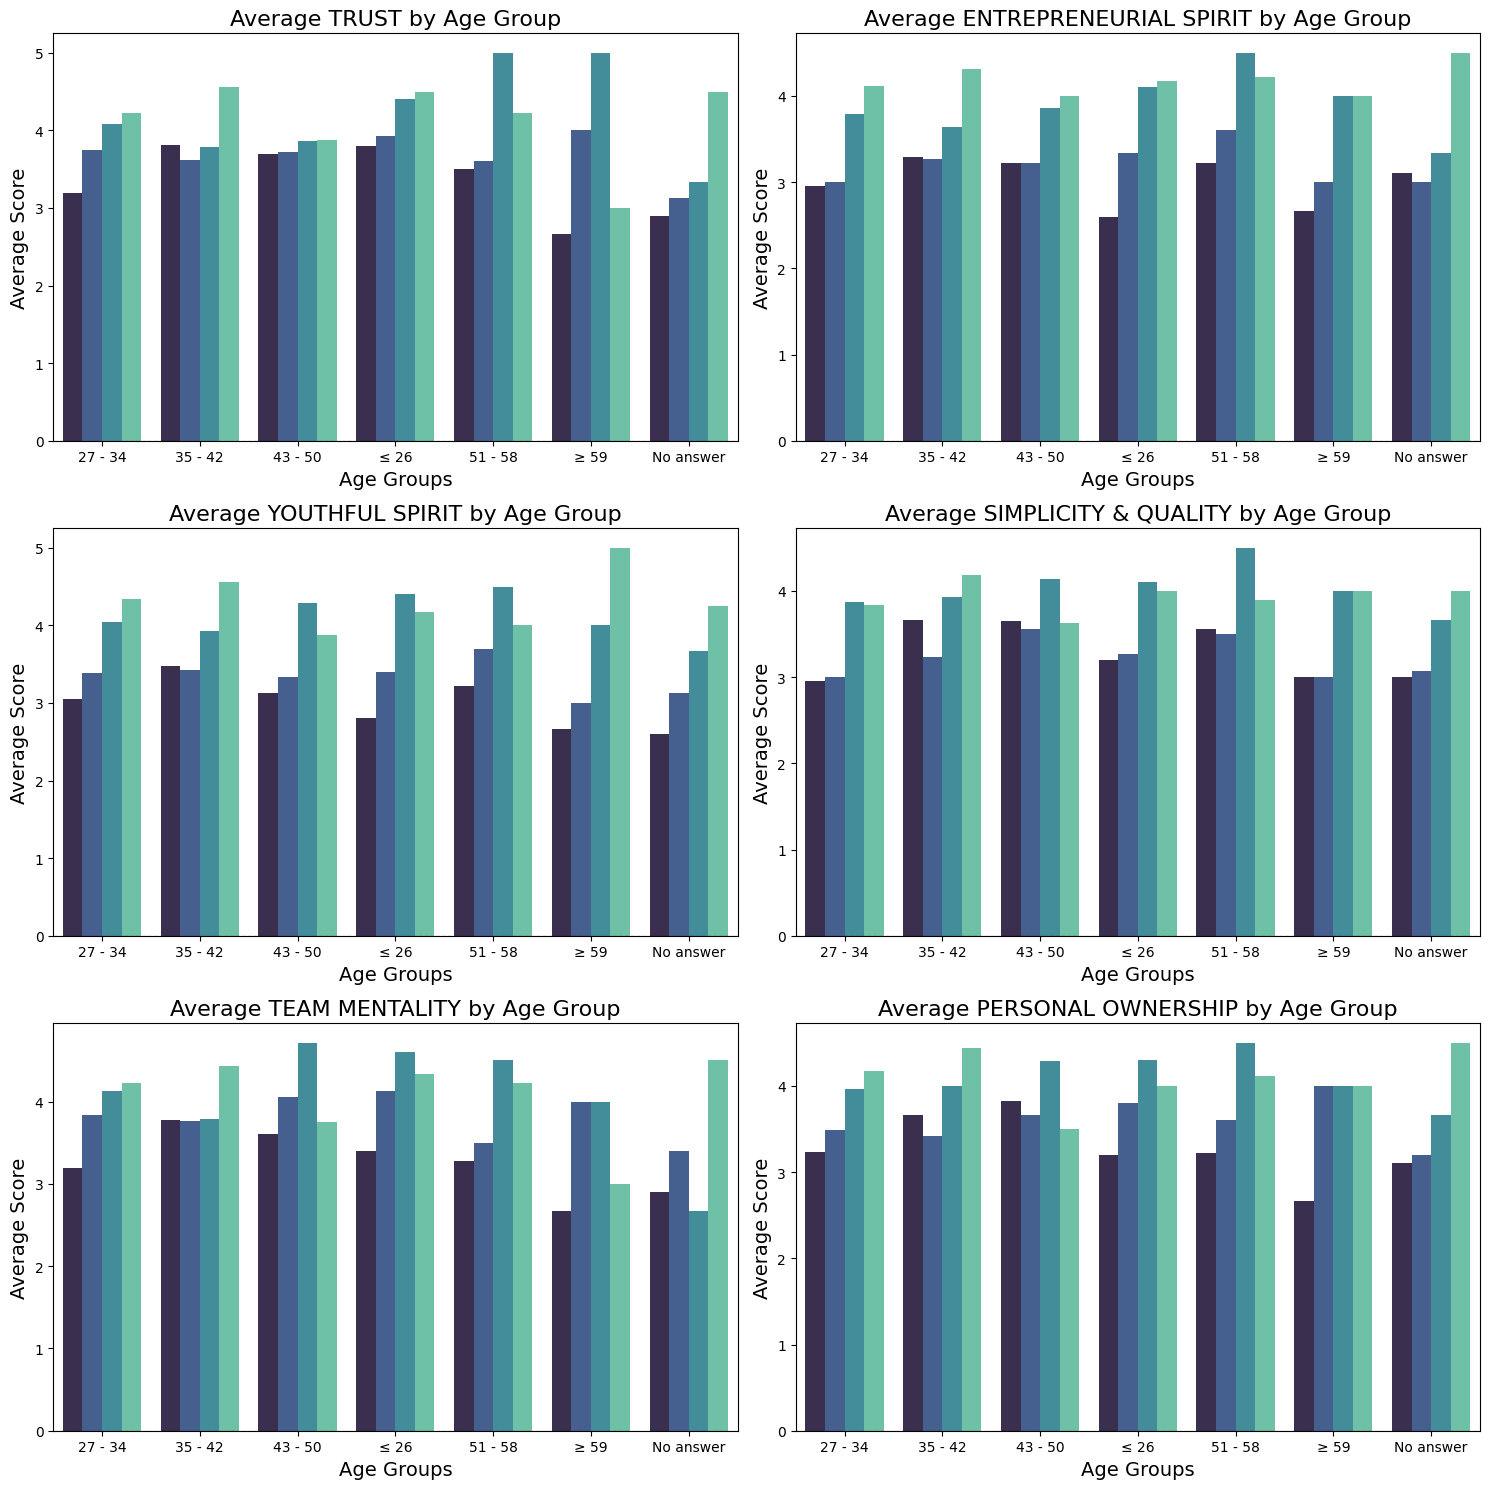

In [266]:
import numpy as np
import seaborn as sns

def get_analysis(column):

    n_qualities = len(qualities_columns)
    n_rows = (n_qualities + 1) // 2 

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, n_rows * 5))
    axes = axes.flatten()  

    for ax, quality in zip(axes, qualities_columns):
        sns.barplot(x=f'{column}', y=quality, hue='Division', data=extracted_data, ax=ax, palette='mako', ci=None, legend=False)
        ax.set_title(f'Average {quality} by {column} Group', fontsize=16)
        ax.set_ylabel('Average Score', fontsize=14)
        ax.set_xlabel(f'{column} Groups', fontsize=14)
        ax.axhline(y=0, color='black', linewidth=0.8, linestyle='--')

    



    plt.tight_layout()
    plt.show()

get_analysis('Age')

The new charts comparing **Retail Management**, **Logistics**, and **IT** across various qualities and age groups provide additional insights. Here are some conclusions based on the observed data:

### Key Insights

1. **Consistent Leadership in Retail Management**:
   - **Retail Management** maintains the highest average scores across all measured qualities. This division's strong performance indicates a positive workplace culture and effective management practices.

2. **Comparative Scores**:
   - **Logistics** shows lower average scores across all dimensions compared to Retail Management. This suggests a need for improved employee engagement and satisfaction within this division.
   - **IT** has scores that are often between Retail Management and Logistics. While IT performs better than Logistics in some dimensions, it still falls short compared to Retail Management.

3. **Trust Scores**:
   - The **Trust** scores indicate that employees in Retail Management feel significantly more trusted compared to those in Logistics and IT, especially across all age groups. This could reflect effective communication and support from leadership.

4. **Youthful Spirit**:
   - Retail Management scores high in **Youthful Spirit**, particularly among younger employees (27-34). This suggests a vibrant and dynamic workplace that fosters innovation and enthusiasm among younger staff.
   - Logistics shows variability in youthful spirit, indicating that the environment may not be as engaging for younger employees.

5. **Entrepreneurial Spirit**:
   - The **Entrepreneurial Spirit** is notably high in Retail Management, suggesting that employees feel empowered to take initiative. Logistics and IT do not reflect the same level of empowerment, indicating potential barriers to innovation and creativity.

6. **Simplicity & Quality**:
   - Retail Management scores higher in **Simplicity & Quality**, indicating that processes are perceived as effective and efficient, leading to higher employee satisfaction.
   - Logistics has lower scores, suggesting that employees may find processes cumbersome or ineffective.

7. **Team Mentality**:
   - The **Team Mentality** scores favor Retail Management, indicating strong collaboration and support among team members, which may enhance job satisfaction and performance.
   - Logistics appears to have more varied scores, pointing to potential challenges in teamwork and collaboration.

8. **Personal Ownership**:
   - Employees in Retail Management exhibit a greater sense of **Personal Ownership**, feeling more responsible for their roles and contributions to the company. This sense of accountability can lead to higher engagement and productivity.
   - Logistics shows lower scores, which might indicate a lack of connection to their work or insufficient encouragement to take ownership.

### Conclusions
- **Strength of Retail Management**: The consistently high scores reflect effective management and a positive culture that fosters trust, empowerment, and engagement among employees.
- **Opportunities for Improvement**: Logistics needs to implement strategies to enhance employee trust, engagement, and empowerment. This might involve training for leaders, improving communication, and creating a more collaborative work environment.
- **IT Performance**: While IT performs better than Logistics, there's still room for improvement, particularly in fostering a more innovative and engaging culture.

### Next Steps
- **Further Investigations**: Conduct qualitative assessments through employee surveys or focus groups to understand the reasons behind the lower scores in Logistics and IT.
- **Best Practices**: Share successful practices from Retail Management with other divisions to help improve employee perceptions and engagement.

If you have any specific actions you'd like to take next or further analyses in mind, feel free to let me know!

The charts you provided allow us to analyze the **impact of age** on various employee perceptions across the divisions of **Retail Management**, **Logistics**, and **IT**. Here are the key insights and recognizable patterns based on the data:

### Impact of Age

1. **Trust Scores**:
   - The **Trust** scores appear to be relatively high across all age groups for Retail Management. Employees under 35 years old show particularly high levels of trust.
   - For **Logistics**, the trust scores are lower across all age groups, indicating potential issues in leadership or communication within that division.

2. **Entrepreneurial Spirit**:
   - Retail Management shows a strong **Entrepreneurial Spirit** across age groups, especially in younger employees (27-34). This indicates that younger employees feel empowered to take initiative, which is crucial for innovation.
   - Logistics has lower scores in this area, suggesting a lack of encouragement for new ideas or initiatives.

3. **Youthful Spirit**:
   - The **Youthful Spirit** scores for Retail Management are particularly high in the younger age groups, reflecting an engaging and dynamic work environment. 
   - Logistics shows more variability, with lower scores in the same age category, which may indicate a less engaging workplace for younger employees.

4. **Simplicity & Quality**:
   - Retail Management maintains high **Simplicity & Quality** scores across age groups, indicating effective processes and clarity in operations.
   - Logistics shows lower scores in this area, suggesting employees might find processes to be more cumbersome or confusing.

5. **Team Mentality**:
   - The **Team Mentality** scores indicate strong collaboration in Retail Management, particularly among younger employees. This division promotes teamwork and support, leading to higher satisfaction.
   - In Logistics, the scores are lower across age groups, potentially indicating silos or a lack of collaborative practices.

6. **Personal Ownership**:
   - Employees in Retail Management feel a strong sense of **Personal Ownership**, particularly in younger age groups. This ownership can lead to higher engagement and accountability.
   - Logistics employees exhibit lower personal ownership scores, suggesting that they may not feel as responsible for their contributions or roles within the company.

### Recognizable Patterns
- **Positive Culture in Retail Management**: The patterns indicate that Retail Management fosters a positive culture that promotes trust, collaboration, and empowerment across all age groups.
- **Challenges in Logistics**: The lower scores in Logistics highlight areas needing improvement, especially in building trust and encouraging personal ownership.
- **Engagement of Younger Employees**: Younger employees in Retail Management show significantly higher engagement and satisfaction levels than their counterparts in Logistics, suggesting that age-related strategies may be beneficial.

### Conclusions
- **Strength of Retail Management**: The division’s strong performance indicates effective management practices that promote a positive work environment.
- **Opportunities for Improvement**: Logistics should focus on enhancing trust, fostering teamwork, and encouraging a sense of ownership among employees, especially the younger demographic.
- **Focus on Age Dynamics**: Tailoring engagement strategies based on age group insights can lead to improvements in employee perceptions and satisfaction.

### Next Steps
- **Qualitative Assessments**: Conduct interviews or surveys to gather feedback from employees in Logistics about their experiences and perceptions.
- **Implement Best Practices**: Consider implementing strategies from Retail Management that promote trust and collaboration across all divisions.

If you have any specific analyses or follow-up actions you’d like to take based on these insights, please let me know!

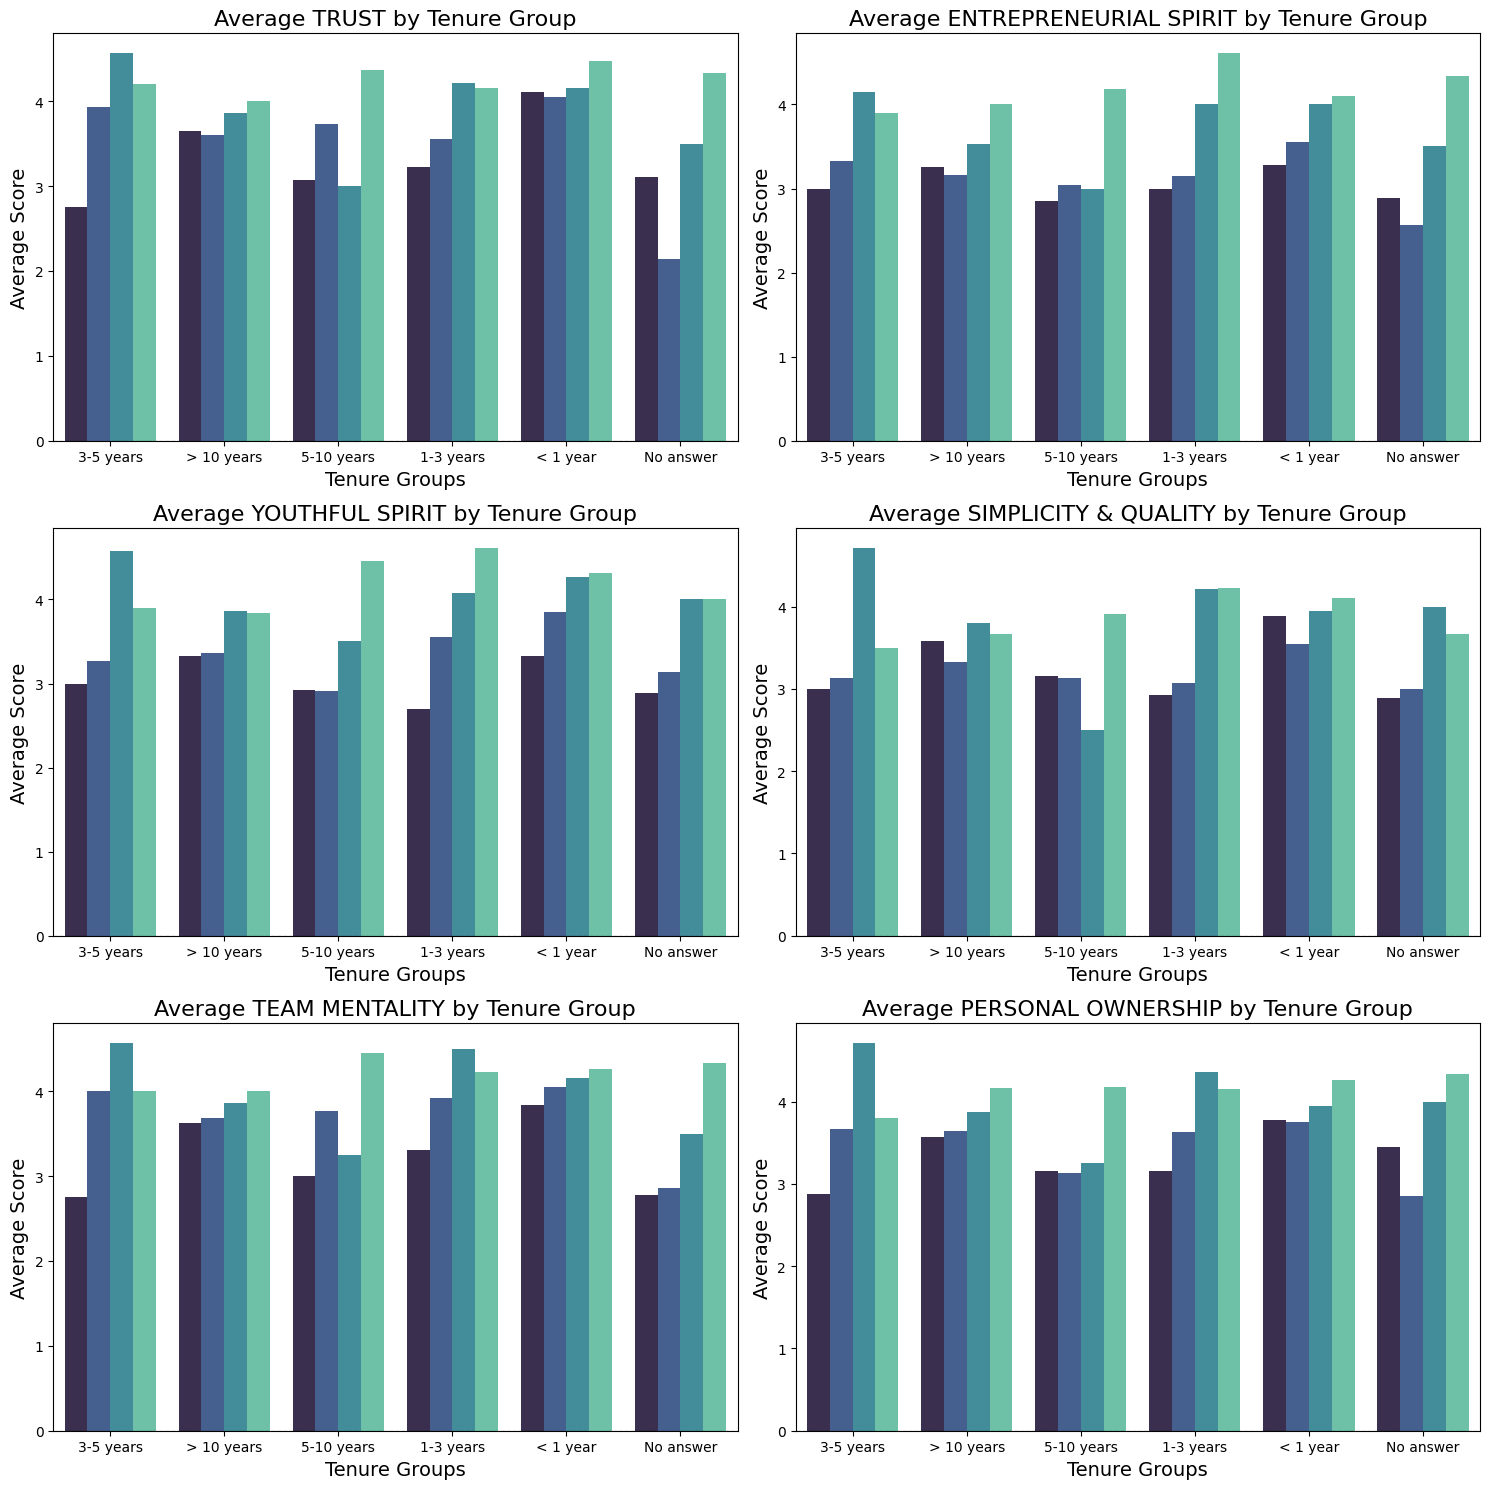

In [267]:
get_analysis('Tenure')

Based on the provided charts comparing **Retail Management**, **Logistics**, and **IT** across various qualities and tenure groups, here are some insights and conclusions:

### Key Insights

1. **Overall Performance**:
   - **Retail Management** consistently ranks highest across all measured qualities (Trust, Entrepreneurial Spirit, Youthful Spirit, Simplicity & Quality, Team Mentality, and Personal Ownership) regardless of tenure group. This suggests that this division maintains a strong and positive workplace culture.

2. **Trust Scores**:
   - The **Trust** scores for Retail Management are significantly higher than those for Logistics and IT across all tenure groups. This indicates that employees in Retail Management feel more confident in their leadership and organizational practices, which is crucial for engagement and performance.

3. **Entrepreneurial Spirit**:
   - Retail Management demonstrates a strong **Entrepreneurial Spirit**. Employees feel empowered to take initiative and innovate, which is essential for fostering creativity and motivation.

4. **Youthful Spirit**:
   - The **Youthful Spirit** scores show that employees in Retail Management, particularly in the lower tenure groups (1-3 years and 3-5 years), exhibit a vibrant and energetic workplace culture. This contrasts with Logistics, where scores are lower, suggesting potential areas for improvement in engagement.

5. **Simplicity & Quality**:
   - Retail Management employees perceive processes as more efficient and effective, indicated by higher **Simplicity & Quality** scores. This may relate to clearer communication and streamlined operations.

6. **Team Mentality**:
   - The **Team Mentality** scores favor Retail Management, indicating stronger collaboration and support among team members. This is critical for employee satisfaction and retention.

7. **Personal Ownership**:
   - Higher **Personal Ownership** scores in Retail Management suggest that employees feel a greater sense of responsibility for their work, which can lead to increased productivity and engagement.

8. **Logistics and IT Performance**:
   - Logistics shows lower average scores across all dimensions, particularly in trust and personal ownership. This highlights the need for focused efforts to enhance employee perceptions and engagement in this division.
   - IT performs moderately well but still falls short of Retail Management, indicating potential areas for improvement in fostering a positive work environment.

### Conclusions
- **Strength of Retail Management**: The consistently high scores reflect effective management and a positive culture that promotes trust, engagement, and ownership among employees.
- **Opportunities for Improvement**:
   - **Logistics** should focus on enhancing trust and engagement among its workforce through better leadership practices, communication, and team-building activities.
   - **IT** may benefit from a deeper exploration of employee sentiments to identify specific areas needing attention.

### Next Steps
- **Qualitative Analysis**: Consider conducting focus groups or interviews with employees from Logistics and IT to understand the underlying reasons for their perceptions.
- **Best Practices Implementation**: Explore best practices from Retail Management to help improve engagement and satisfaction in the other divisions.

If you would like further analysis or specific actions based on these insights, feel free to let me know!

Based on the insights drawn from the charts comparing **Retail Management**, **Logistics**, and **IT** across various qualities and tenure groups, several recognizable patterns emerge:

### Recognizable Patterns

1. **Consistent High Performance in Retail Management**:
   - Retail Management shows a consistent pattern of high scores across all qualities regardless of tenure. This indicates a strong culture and effective leadership that fosters positive employee experiences.

2. **Trust and Empowerment**:
   - Higher **Trust** scores correlate with higher **Entrepreneurial Spirit** scores in Retail Management. This suggests that when employees feel trusted, they are more likely to feel empowered to take initiative and innovate.

3. **Impact of Tenure**:
   - In Retail Management, newer employees (1-3 years) often exhibit strong engagement and higher scores, which may indicate effective onboarding and a supportive work environment. Conversely, Logistics shows lower scores, particularly among new employees, suggesting a potential gap in integration or support.

4. **Youthful Engagement**:
   - The **Youthful Spirit** scores are notably high in Retail Management, indicating that the division fosters a dynamic and energetic workplace that appeals to younger employees. This contrasts with Logistics, where lower scores suggest less engagement among younger staff.

5. **Team Dynamics**:
   - **Team Mentality** scores are consistently high in Retail Management, indicating strong collaboration and support within teams. This pattern might be weaker in Logistics, where lower scores suggest potential silos or lack of cooperation.

6. **Perceptions of Simplicity and Quality**:
   - Higher scores in **Simplicity & Quality** for Retail Management indicate that processes are perceived as effective and efficient. This perception may not be as prevalent in Logistics and IT, where scores tend to be lower, reflecting potential challenges in process management.

7. **Personal Ownership Correlation**:
   - Higher **Personal Ownership** scores in Retail Management indicate that employees feel a sense of accountability and responsibility for their work. This is less pronounced in Logistics, where lower scores suggest employees may feel less connected to their roles.

### Implications of Recognized Patterns
- **Cultural Differences**: The strong performance in Retail Management indicates a positive culture that could serve as a model for other divisions.
- **Engagement Strategies**: Understanding the factors contributing to the high scores in Retail Management can inform engagement strategies in Logistics and IT, such as improving trust and enhancing team dynamics.
- **Focus on Onboarding**: The success in Retail Management among new employees highlights the importance of effective onboarding and integration practices, which could be beneficial if applied to Logistics.

### Next Steps
1. **Further Analysis**: Conduct a deeper analysis to explore the specific elements contributing to the positive patterns in Retail Management.
2. **Implementation of Best Practices**: Share findings and best practices from Retail Management with other divisions to help improve employee engagement and perceptions.
3. **Monitoring Changes**: After implementing strategies, monitor changes in employee sentiment and engagement across divisions.

If you have specific aspects of these patterns you would like to explore further or any particular analyses in mind, please let me know!

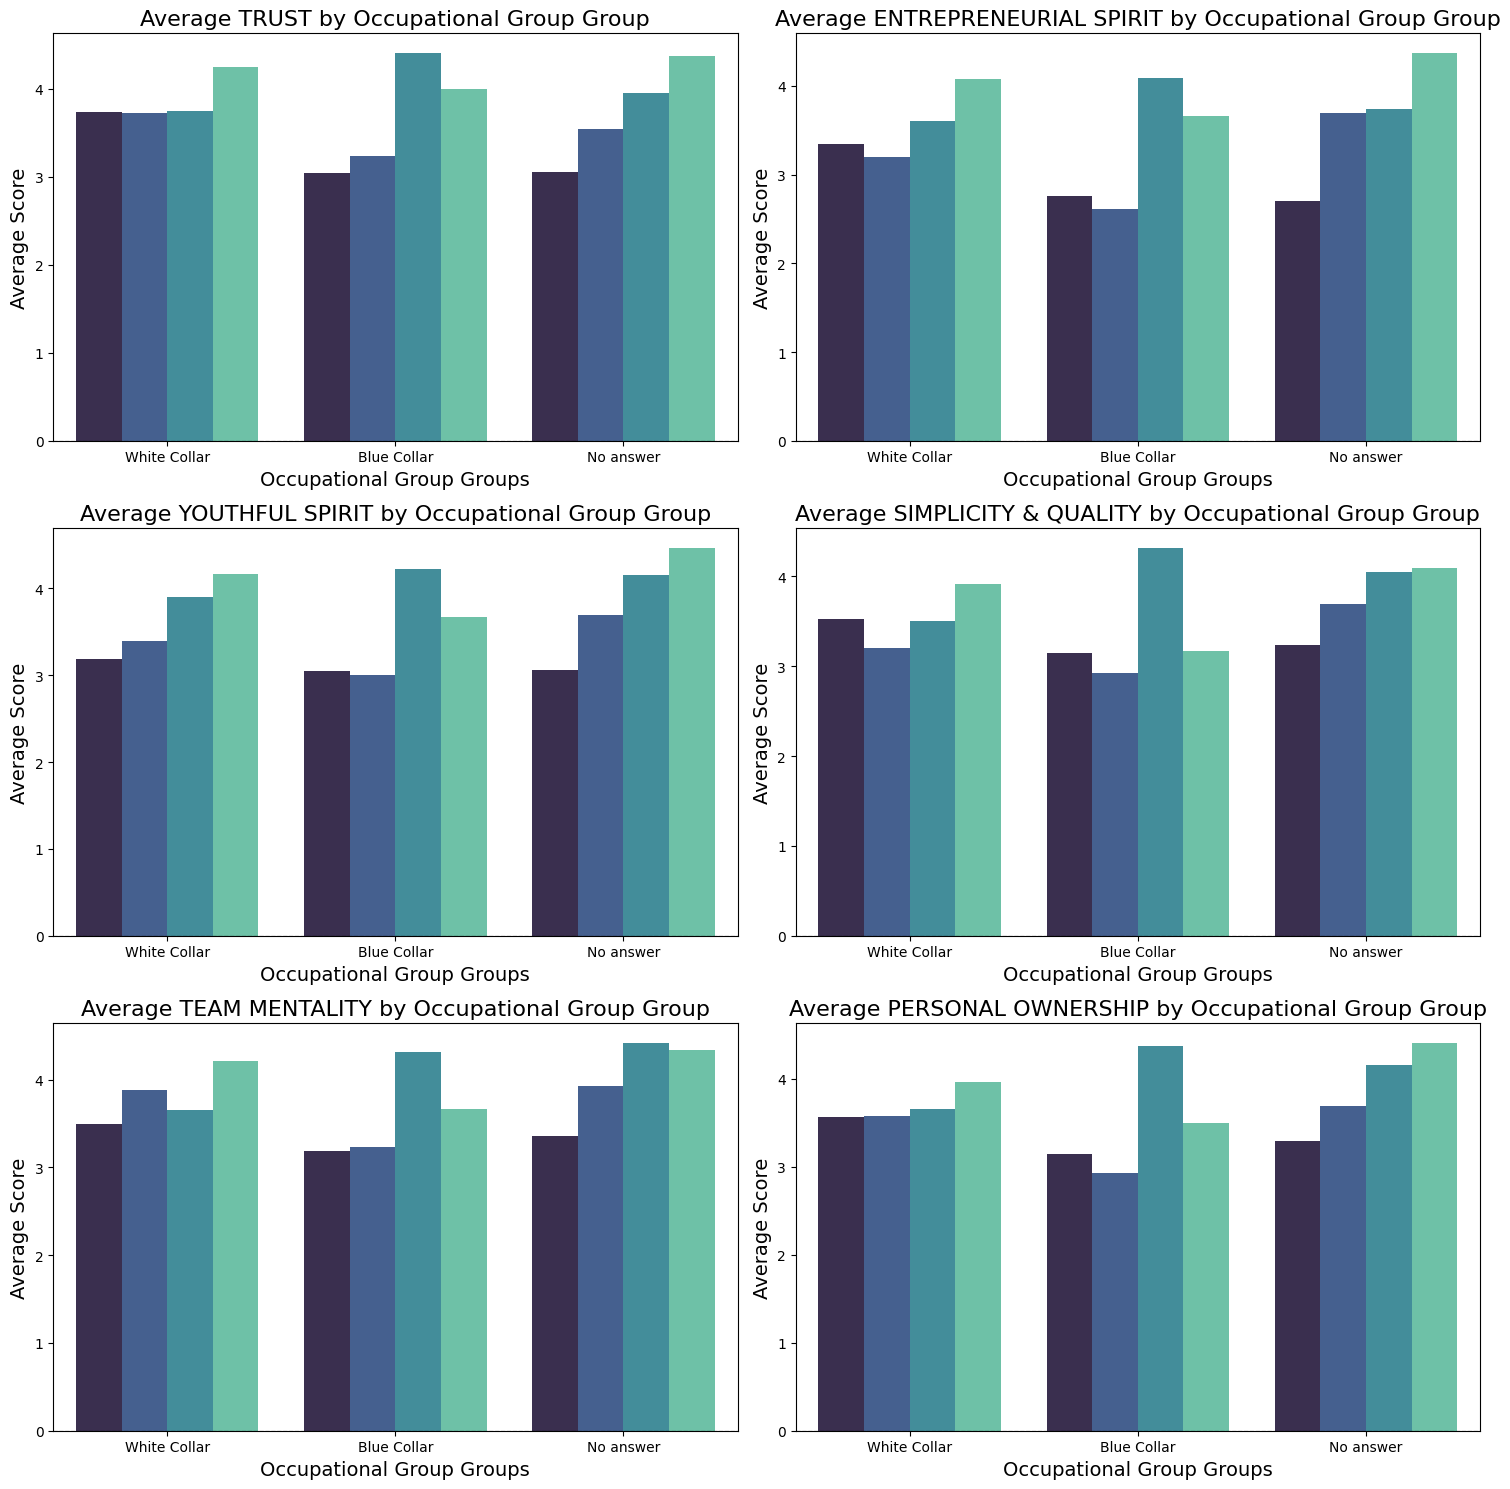

In [268]:
get_analysis("Occupational Group")

Based on the new charts comparing **Retail Management**, **Logistics**, and **IT** across various qualities and occupational groups, we can draw several insights and conclusions regarding employee perceptions. Here’s the analysis:

### Key Insights

1. **Overall Performance**:
   - **Retail Management** continues to demonstrate the highest average scores across all metrics compared to **Logistics** and **IT**. This trend reinforces the idea that Retail Management has a strong organizational culture that supports employee satisfaction.

2. **Trust Scores**:
   - Trust scores for Retail Management are particularly high across all occupational groups (Blue Collar, White Collar, and No answer). This suggests that employees in Retail Management feel a high level of confidence in their leaders and organizational processes.
   - Logistics scores are notably lower, especially in the Blue Collar group, indicating potential gaps in trust and communication.

3. **Entrepreneurial Spirit**:
   - Retail Management shows higher scores in the **Entrepreneurial Spirit** dimension across all occupational groups. This indicates that employees feel encouraged to innovate and take initiative.
   - The scores for Logistics and IT are lower, suggesting that these divisions may not promote entrepreneurial behaviors as effectively as Retail Management.

4. **Youthful Spirit**:
   - **Youthful Spirit** scores are particularly high for Retail Management employees, indicating a lively and engaging workplace. 
   - Logistics exhibits lower scores in this area, which might suggest a need for improved employee engagement strategies to attract and retain younger talent.

5. **Simplicity & Quality**:
   - In terms of **Simplicity & Quality**, Retail Management maintains high scores, reflecting well-managed processes and clarity in operations.
   - Logistics scores are lower, suggesting that employees may find processes to be cumbersome or inefficient, potentially impacting their overall satisfaction.

6. **Team Mentality**:
   - The **Team Mentality** scores highlight a strong culture of collaboration in Retail Management. This indicates effective teamwork and a supportive environment among employees.
   - In contrast, Logistics shows lower scores, which may reflect issues with collaboration and communication among team members.

7. **Personal Ownership**:
   - Retail Management employees exhibit a strong sense of **Personal Ownership**, indicating they feel responsible for their work and contributions. This is essential for fostering accountability and high performance.
   - The scores in Logistics are lower, suggesting employees may not feel as connected or accountable to their roles, indicating a need for enhanced engagement practices.

### Conclusions
- **Strength of Retail Management**: The consistently high scores across multiple dimensions indicate effective leadership and a positive work culture that fosters trust, collaboration, and engagement.
- **Improvement Opportunities in Logistics**: The lower scores in Logistics highlight areas for improvement, particularly in building trust and fostering a collaborative environment.
- **Engagement Strategies**: Both Logistics and IT can learn from Retail Management's practices, especially regarding employee empowerment, trust-building, and team dynamics.

### Next Steps
- **Qualitative Research**: Conduct surveys or focus groups with employees from Logistics and IT to understand the specific challenges they face and gather insights for improvement.
- **Implement Best Practices**: Share successful strategies from Retail Management with Logistics and IT to help enhance employee perceptions and satisfaction.

If you need further analyses or specific actions based on these insights, please let me know!